# 👩‍💻 Multi-Domain Machine Learning Challenge: From Classification to Optimization Time Estimate: 150 minutes (2.5 hours)

## 📋 Overview

📋 Overview In this comprehensive lab, you'll work with scikit-learn's wine and 20 newsgroups datasets to explore various machine learning domains. You'll implement ensemble methods, perform dimensionality reduction, tackle text classification, and explore optimization techniques. This lab synthesizes key machine learning concepts into a cohesive, practical experience.

## 🎯 Learning Outcomes

By the end of this lab, you will be able to:

✅ Build and evaluate ensemble models using scikit-learn

✅ Apply PCA for dimensionality reduction and visualization

✅ Implement text classification using NLP techniques

✅ Optimize models using cross-validation and parameter tuning

✅ Interpret and visualize machine learning results


## 🖥️ Tasks

### 📂 Task 1: Ensemble Learning with Wine Dataset (30 minutes)

Using the wine dataset, you'll build an ensemble model to classify wine varieties based on their chemical properties.

**Steps:**
1. Split data into training and testing sets
2. Implement RandomForestClassifier
3. Evaluate using cross-validation

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups, load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, learning_curve, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the data
wine = load_wine()
X = wine.data
y = wine.target

In [2]:
# Step 1: Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Implement RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


# Step 3: Evaluate using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)


## Grading of Lab Assignments:
The grading of this assignment is based on the test cases throughout this notebook within the `### BEGIN TESTS` and `### END TESTS` comments. 

Each task has a number of test cells. For example, the cell below uses four tests to confirm the shape of the dataset, the use of RandomForestClassifier, and the expected length and mean of the cross-validation scores.

Run all of these test cells throughout the project to confirm you pass the tests and are on the right track. Once you have passed all the tests in the entire notebook, or are happy with your results you can click the `Submit Assignment` button in the top right corner for your final submission and grading. 

Good luck!

In [3]:
### BEGIN TESTS
assert X.shape[1] == 13, "Dataset should have 13 features"

assert isinstance(rf, RandomForestClassifier), "rf should be a RandomForestClassifier instance"

assert hasattr(cv_scores, '__len__') and len(cv_scores) == 5, "There should be 5 cross-validation scores"

assert cv_scores.mean() >= 0.90, f"Average CV score should be at least 0.90, got {cv_scores.mean()}"
### END TESTS

## ✅ Success Checklist

* Dataset should load successfully with 13 features
* Cross-validation scores should be printed
* Average score should be above 0.90


## 💡 Key Points
* Class balance shapes metric choice — use F1 or precision for imbalanced data.
* Random Forest handles complexity well — robust, accurate, and interpretable.
* Cross-validation checks model stability — ensures consistent performance.

### 🔍 Task 2: Dimensionality Reduction and Visualization (30 minutes)

We'll use PCA to visualize how the different wine varieties cluster based on their chemical properties.

Steps:
1. Apply PCA to the wine dataset
2. Create visualization of the first two principal components
3. Analyze feature contributions to principal components
4. Plot explained variance ratio


Feature contributions to first two PCs:
                                PC1    PC2
alcohol                       0.002  0.001
malic_acid                   -0.001  0.002
ash                           0.000  0.005
alcalinity_of_ash            -0.005  0.026
magnesium                     0.018  0.999
total_phenols                 0.001  0.001
flavanoids                    0.002 -0.000
nonflavanoid_phenols         -0.000 -0.001
proanthocyanins               0.001  0.005
color_intensity               0.002  0.015
hue                           0.000 -0.001
od280/od315_of_diluted_wines  0.001 -0.003
proline                       1.000 -0.018


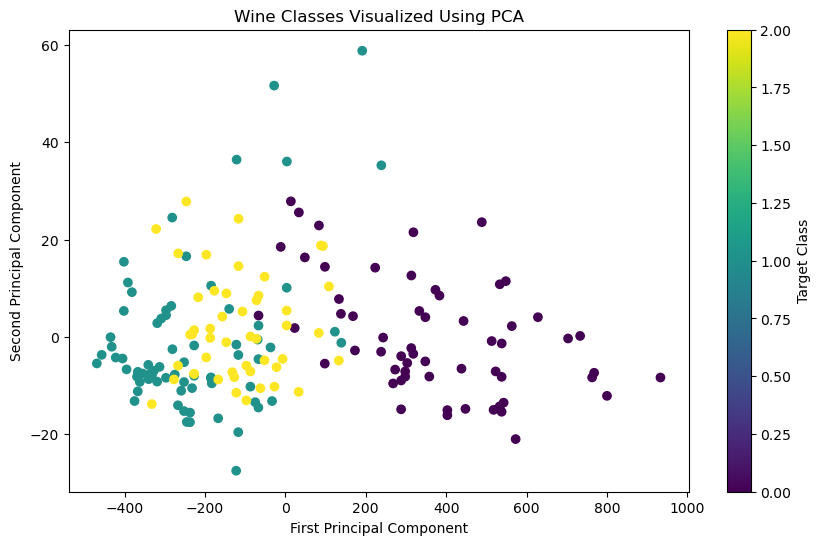

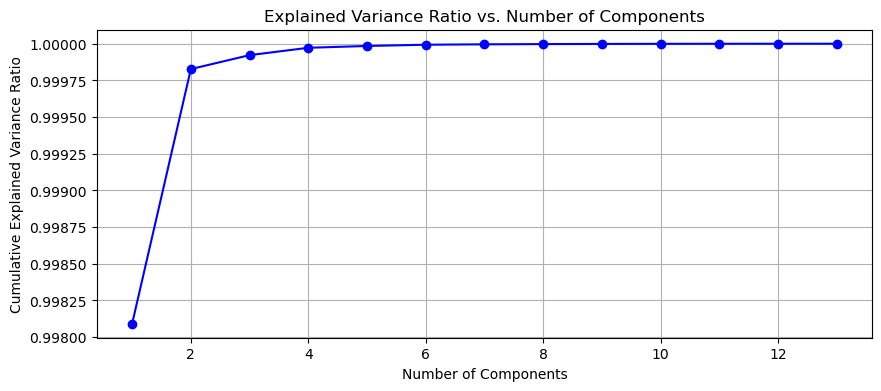

In [4]:
# Step 1: Apply PCA to the wine dataset
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 2: Create visualization of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Classes Visualized Using PCA')
plt.colorbar(label='Target Class')

# Step 3: Analyze feature contributions to principal components
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=wine.feature_names
)
print("\nFeature contributions to first two PCs:")
print(components_df[['PC1', 'PC2']].round(3))

# Step 4: Plot explained variance ratio
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
          np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


In [5]:
### BEGIN TESTS
assert X_pca.ndim == 2, "X_pca should be a 2D array"

assert X_pca.shape[1] == X.shape[1], \
    f"PCA should return {X.shape[1]} components, got {X_pca.shape[1]}"

assert components_df.shape[0] == X.shape[1], \
    "components_df should have rows equal to number of features"

assert 'PC1' in components_df.columns and 'PC2' in components_df.columns, \
    "components_df should contain PC1 and PC2"
### END TESTS

## ✅ Success Checklist
* Two plots should be generated
* Clusters should be visible in the PCA scatter plot
* Explained variance plot should show cumulative variance

## 💡 Key Points
* PCA simplifies data for visualization, highlighting class separation in 2D.
* Explained variance shows how many components matter for retaining information.
* Feature loadings reveal which variables drive key components.

### 🔍 Task 3: Text Classification with News Data (30 minutes)

Using sklearn's 20 newsgroups dataset, we'll build a text classifier to categorize news articles.

Steps:
1. Load a subset of the 20 newsgroups dataset
2. Create a text classification pipeline
3. Train and evaluate the model
4. Test on sample texts

In [6]:
# Step 1: Load a subset of the 20 newsgroups dataset
categories = ['sci.med', 'sci.space', 'rec.sport.baseball', 'talk.politics.misc']
print("Loading 20 newsgroups dataset for categories:", categories)

newsgroups = fetch_20newsgroups(subset='all',
                               categories=categories,
                               shuffle=True,
                               random_state=42,
                               remove=('headers', 'footers', 'quotes'))

# Step 2: Create a text classification pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', MultinomialNB()),
])

X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data,
    newsgroups.target,
    test_size=0.2,
    random_state=42
)

# Step 3: Train and evaluate the model
print("Training model...")
text_clf.fit(X_train, y_train)

# Step 4: Test on sample texts
print("Making predictions...")
y_pred = text_clf.predict(X_test)


Loading 20 newsgroups dataset for categories: ['sci.med', 'sci.space', 'rec.sport.baseball', 'talk.politics.misc']
Training model...
Making predictions...


In [7]:
### BEGIN TESTS
assert len(categories) == 4, "There should be 4 categories loaded"

assert hasattr(text_clf, 'predict'), "text_clf should have a predict method"

assert len(y_pred) == len(y_test), \
    f"Number of test-set predictions ({len(y_pred)}) should match test set size ({len(y_test)})"

assert set(y_pred).issubset(set(range(len(categories)))), \
    "Predicted categories for the test set should be within valid range"
### END TESTS

## ✅ Success Checklist
* Model should train without errors
* Classification report should show reasonable metrics
* Sample text predictions should make logical sense
* Top features for each category should be relevant

## 💡 Key Points
* TF-IDF boosts relevance — it emphasizes distinctive terms over frequent ones.
* Category choice impacts performance — overlapping topics may confuse the model.
* Preprocessing boosts accuracy — removing noise (e.g. stopwords, headers) improves results.
* Naive Bayes with a pipeline is fast and effective — especially for text classification.
* Top features help explain predictions — showing which words drive classification.

### 🔍 Task 4: Model Optimization with Cross-Validation (30 minutes)

We'll optimize and evaluate our wine classification model using proper cross-validation and visualization techniques.

Steps:
1. Set up validation strategy
2. Create and evaluate base model
3. Plot learning curves
4. Analyze feature importance

Performing cross-validation...
Cross-validation scores: [1.         1.         0.92857143 0.96428571 1.        ]
Average CV score: 0.979 (+/- 0.057)

Generating learning curves...


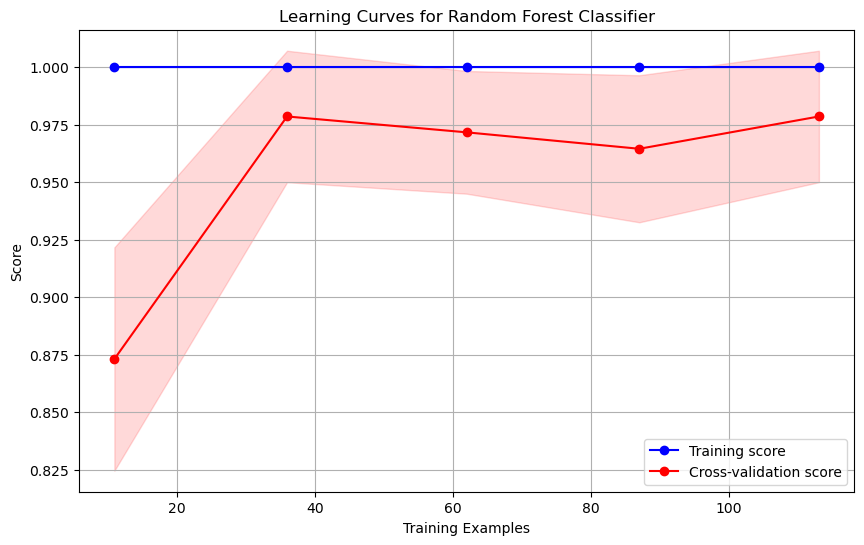

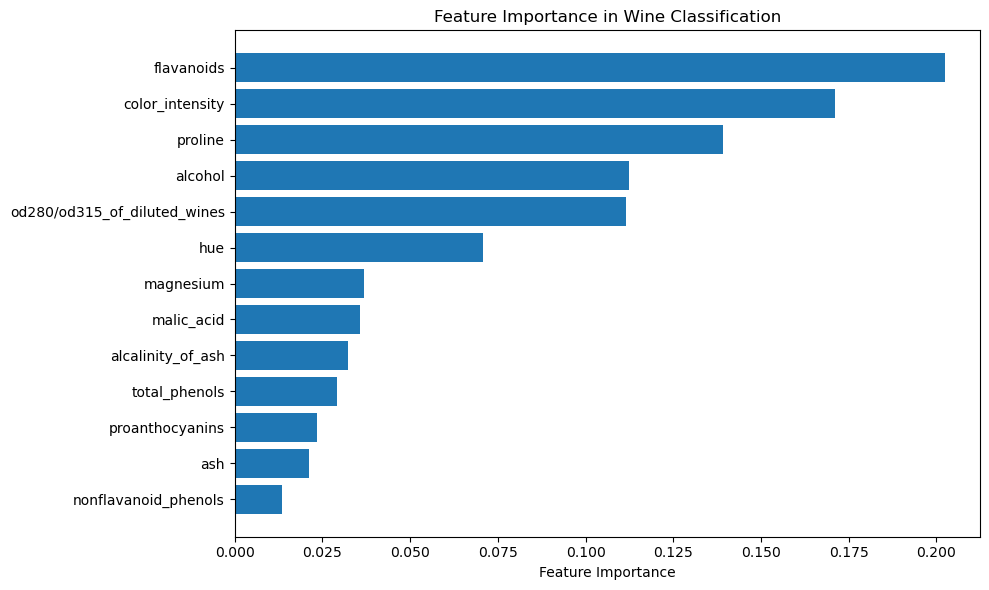


Top 5 Most Important Features:
flavanoids: 0.2023
color_intensity: 0.1712
proline: 0.1390
alcohol: 0.1124
od280/od315_of_diluted_wines: 0.1116

Test Set Accuracy: 1.000


In [8]:
# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)


# Step 1: Set up validation strategy
print("Performing cross-validation...")
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Step 2: Create and evaluate base model
print("\nGenerating learning curves...")
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train_scaled,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Step 3: Plot learning curves
# Calculate mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 4: Analyze feature importance
# Train the model and get feature importance
rf.fit(X_train_scaled, y_train)

# Create feature importance plot
feature_importance = rf.feature_importances_
feature_names = wine.feature_names
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Classification')
plt.tight_layout()
plt.show()

# Print top 5 most important features
top_features_idx = np.argsort(feature_importance)[::-1][:5]
print("\nTop 5 Most Important Features:")
for idx in top_features_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

# Evaluate on test set
y_pred = rf.predict(X_test_scaled)
test_accuracy = rf.score(X_test_scaled, y_test)
print(f"\nTest Set Accuracy: {test_accuracy:.3f}")


In [9]:
### BEGIN TESTS
assert isinstance(test_accuracy, float), "test_accuracy should be a float"
assert test_accuracy >= 0.85, f"Test set accuracy should be at least 0.85, got {test_accuracy}"
assert len(top_features_idx) == 5, "There should be 5 most important features"
assert len(feature_importance) == X.shape[1], "feature_importance length should match number of features"
### END TESTS

## ✅ Success Checklist
* Cross-validation scores should be printed
* Two plots should be generated:
  1. Learning curves showing training and validation scores
  2. Feature importance bar plot
* Top 5 important features should be listed
* Test set accuracy should be above 0.90

## 💡 Key Points
* Learning curves reveal bias vs. variance — gaps between training and validation scores indicate overfitting or underfitting.
* Feature importance highlights key drivers — top features align with chemical properties relevant to wine classification.
* Random Forest balances power and interpretability — effective with scaled data and useful for insight into feature relevance.

### 🔍 Task 5: Comparing Models and Validation (30 minutes)

We'll compare different classifiers on the wine dataset and implement K-fold cross-validation for robust evaluation.

Steps:
1. Set up multiple classifiers
  * Initialize Random Forest, SVM, and KNN models
  * Prepare data with StandardScaler
2. Perform cross-validation
  * Run 5-fold cross-validation for each model
  * Calculate and compare mean accuracies
3. Create visualization comparisons
  * Generate box plots of model performances
  * Create confusion matrix for best model
4. Evaluate best model
  * Identify best performing classifier
  * Generate detailed classification report
  * Test on sample predictions

In [10]:
# Step 1: Set up multiple classifiers
## Initialize Random Forest, SVM, and KNN models


## Prepare data with StandardScaler



In [11]:
# Step 2: Perform cross-validation
## Run 5-fold cross-validation for each model


## Calculate and compare mean accuracies



In [12]:
# Step 3: Create visualization comparisons
## Generate box plots of model performances


## Create confusion matrix for best model



In [13]:
# Step 4: Evaluate best model
## Identify best performing classifier


## Generate detailed classification report


## Test on sample predictions



In [14]:
### BEGIN TESTS
assert isinstance(cv_scores, dict), "cv_results should be a dictionary"
assert all(isinstance(k, str) for k in cv_scores.keys()), "cv_results keys should be strings"
assert all(hasattr(v, '__len__') for v in cv_scores.values()), "All cv_results values should be sequences"
assert len(cv_scores) >= 2, "There should be at least two models compared in cv_results"
assert isinstance(best_model, (RandomForestClassifier, SVC, KNeighborsClassifier)), "best_model should be an instance of a known classifier"
### END TESTS

AssertionError: cv_results should be a dictionary

## ✅ Success Checklist
* Cross-validation scores should be displayed for all models
* Box plot should show clear comparison between models
* Confusion matrix should be readable and properly labeled
* Sample predictions should match expected wine categories

## 💡 Key Points
* Cross-validation highlights consistency — boxplots reveal variability and robustness across models.
* Confusion matrix shows classification challenges — some wine classes are harder to separate.
* Model tuning can boost weaker models — hyperparameters and preprocessing may improve accuracy.

## 💻 Exemplar Solution

<details>    
<summary><strong>Click HERE to see an exemplar solution</strong></summary>

### Task 1: Ensemble Learning with Wine Dataset
    
```python
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for better data inspection
wine_df = pd.DataFrame(X, columns=wine.feature_names)
print("Dataset Shape:", wine_df.shape)
print("\nFeature Names:", wine.feature_names)
print("\nFirst few rows:")
print(wine_df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("\nCross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
```

### Task 2: Dimensionality Reduction and Visualization

```python
# Import additional libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Classes Visualized Using PCA')
plt.colorbar(label='Target Class')

# Plot explained variance ratio
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
          np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Print feature contributions
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=wine.feature_names
)
print("\nFeature contributions to first two PCs:")
print(components_df[['PC1', 'PC2']].round(3))
```

### Task 3: Text Classification with News Data


```python    
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load a subset of the 20 newsgroups dataset
categories = ['sci.med', 'sci.space', 'rec.sport.baseball', 'talk.politics.misc']
print("Loading 20 newsgroups dataset for categories:", categories)

newsgroups = fetch_20newsgroups(subset='all',
                               categories=categories,
                               shuffle=True,
                               random_state=42,
                               remove=('headers', 'footers', 'quotes'))

# Create the pipeline
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', MultinomialNB()),
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data,
    newsgroups.target,
    test_size=0.2,
    random_state=42
)

# Train the model
print("Training model...")
text_clf.fit(X_train, y_train)

# Make predictions
print("Making predictions...")
y_pred = text_clf.predict(X_test)

# Print performance report
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=categories
))

# Test on some sample texts
sample_texts = [
    "The spacecraft launched successfully from Cape Canaveral",
    "The doctor prescribed antibiotics for the infection",
    "The Yankees won the baseball game in extra innings",
    "The senate will vote on the new bill next week"
]

print("\nPredicting categories for sample texts:")
predictions = text_clf.predict(sample_texts)
for text, predicted in zip(sample_texts, predictions):
    print(f'\nText: {text}')
    print(f'Predicted category: {categories[predicted]}')

# Get feature names and their importance scores
tfidf = text_clf.named_steps['tfidf']
clf = text_clf.named_steps['clf']

# Get top features for each category
feature_names = tfidf.get_feature_names_out()
for i, category in enumerate(categories):
    top_features_idx = clf.feature_log_prob_[i].argsort()[-10:][::-1]
    top_features = [feature_names[idx] for idx in top_features_idx]
    print(f"\nTop 10 features for {category}:")
    print(", ".join(top_features))
```

### Task 4: Model Optimization with Cross-Validation


```python    
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Perform cross-validation
print("Performing cross-validation...")
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Generate learning curves
print("\nGenerating learning curves...")
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train_scaled,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Calculate mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='red', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='red')

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Train the model and get feature importance
rf.fit(X_train_scaled, y_train)

# Create feature importance plot
feature_importance = rf.feature_importances_
feature_names = wine.feature_names
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Wine Classification')
plt.tight_layout()
plt.show()

# Print top 5 most important features
top_features_idx = np.argsort(feature_importance)[::-1][:5]
print("\nTop 5 Most Important Features:")
for idx in top_features_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

# Evaluate on test set
y_pred = rf.predict(X_test_scaled)
test_accuracy = rf.score(X_test_scaled, y_test)
print(f"\nTest Set Accuracy: {test_accuracy:.3f}")

# Print example predictions
print("\nExample Predictions:")
for i in range(5):
    true_label = wine.target_names[y_test[i]]
    pred_label = wine.target_names[y_pred[i]]
    print(f"True: {true_label}, Predicted: {pred_label}")

    
```

### Task 5: Comparing Models and Validation
    
```python
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess data
wine = load_wine()
X = wine.data
y = wine.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Perform k-fold cross-validation for each model
print("Comparing model performances using 5-fold cross-validation:\n")
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name}:")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    print()

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
box_data = [cv_scores[name] for name in models.keys()]
plt.boxplot(box_data, labels=models.keys()])
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train the best model (based on cross-validation results)
best_model_name = max(cv_scores, key=lambda k: cv_scores[k].mean())
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name}")

# Fit the best model and get predictions
best_model.fit(X_scaled, y)
y_pred = best_model.predict(X_scaled)

# Create confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y, y_pred, target_names=wine.target_names))

# Test model on sample predictions
print("\nSample Predictions:")
for i in range(5):
    idx = np.random.randint(0, len(y))
    true_label = wine.target_names[y[idx]]
    pred_label = wine.target_names[best_model.predict([X_scaled[idx]])[0]]

    print(f"Sample {i+1}:")
    print(f"True: {true_label}")
    print(f"Predicted: {pred_label}")
    print()
```